In [740]:
import pickle, os, copy

uttid = 'valid_test_vp_aud.zip:6528253780:27645'
min_pmi = -10
split = 'en-valid_vp-subset100'
lan_pair = 's2u_en-es'
parse_alg = "top_down"
parse_alg = "bottom_up"

# setup data pth 
if parse_alg == "top_down":
    span_pkl = f'/data/sls/scratch/clai24/lexicon/exp/hubert_infoalign_parse/{lan_pair}/spans/v03.{split}.{parse_alg}/{uttid}-minsplitpmi{min_pmi}.pkl'
elif parse_alg == "bottom_up":
    span_pkl = f'/data/sls/scratch/clai24/lexicon/exp/hubert_infoalign_parse/{lan_pair}/spans/v03.{split}.{parse_alg}/{uttid}-minmergepmi{min_pmi}.pkl'
word_seg_pkl = f'/data/sls/temp/clai24/data/speech_matrix/speech_to_unit/mfa_s2u_manifests/{lan_pair}/{split}-words_seg.pkl'
phones_seg_pkl = f'/data/sls/temp/clai24/data/speech_matrix/speech_to_unit/mfa_s2u_manifests/{lan_pair}/{split}-phones_seg.pkl'
tsv_file = f'/data/sls/scratch/clai24/lexicon/exp/hubert_kmeans/{lan_pair}/{split}.tsv'
save_pth = f'/data/sls/scratch/clai24/lexicon/exp/hubert_infoalign_parse/{lan_pair}/viz/{split}-{uttid}-minmergepmi{minimal_merging_pmi}.png'

print(f"span_pkl is {span_pkl}")
assert os.path.exists(span_pkl), print(span_pkl)
assert os.path.exists(word_seg_pkl)
assert os.path.exists(phones_seg_pkl)
assert os.path.exists(tsv_file)

def read_tsv(): 
    if split == 'en-test_epst':
        filename = os.path.join('/data/sls/temp/clai24/data/speech_matrix/eval_data/europarl_st/fairseq_processed/audios/en/', f"{uttid}.wav")
    elif split == 'en-test_fleurs':
        filename = os.path.join('/data/sls/temp/clai24/data/speech_matrix/eval_data/fairseq_processed_fleurs/audios/en', f"{uttid}.flac")
    elif 'en-valid_vp' in split:
        filename = os.path.join('/data/sls/temp/clai24/data/speech_matrix/speech_to_unit/audios', f"{uttid}")
    return filename 

def read_parse_pickle(oracle_phone_seg): 
    with open(span_pkl, "rb") as file:
        my_dict = pickle.load(file)
        if parse_alg == "top_down":
            my_list = [x[0] for x in my_dict] # this is the indidces of phone segments
            my_dict = []
            for t in my_list:
                start_seg_id, end_seg_id = t
                start_sec = oracle_phone_seg[start_seg_id][1]
                end_sec = oracle_phone_seg[end_seg_id][2]
                my_dict.append((start_sec, end_sec))
    return my_dict

def read_segmentation_pickle(seg_pkl): 
    with open(seg_pkl, "rb") as file:
        utt2seg = pickle.load(file)
    return utt2seg[uttid]

hubert_sample_rate = 50 # 50 Hz
wav_file = read_tsv()
oracle_word_seg = read_segmentation_pickle(word_seg_pkl)
oracle_word_seg = [(x, y, z) for (x, y, z) in oracle_word_seg if x != '']
oracle_phone_seg = read_segmentation_pickle(phones_seg_pkl)
my_dict = read_parse_pickle(oracle_phone_seg)

span_pkl is /data/sls/scratch/clai24/lexicon/exp/hubert_infoalign_parse/s2u_en-es/spans/v03.en-valid_vp-subset100.bottom_up/valid_test_vp_aud.zip:6528253780:27645-minmergepmi-10.pkl


In [741]:
my_dict

{0: (69, 70),
 1: (37, 38),
 2: (41, 42),
 3: (23, 24),
 4: (22, 23),
 5: (21, 22),
 6: (20, 21),
 7: (48, 49),
 8: (6, 7)}

In [742]:
print(oracle_phone_seg)
print('')
print(oracle_word_seg)
print(f"\nnumber of oracle_phone_seg is {len(oracle_phone_seg)}")

[('AY1', 0.0, 0.08), ('W', 0.08, 0.14), ('UH1', 0.14, 0.17), ('D', 0.17, 0.24), ('L', 0.24, 0.3), ('AY1', 0.3, 0.39), ('K', 0.39, 0.48), ('Y', 0.48, 0.56), ('UW1', 0.56, 0.6), ('T', 0.6, 0.72), ('UW1', 0.72, 0.81), ('W', 0.81, 0.91), ('ER1', 0.91, 1.08), ('K', 1.08, 1.2), ('', 1.2, 1.57), ('V', 1.57, 1.68), ('EH1', 1.68, 1.77), ('R', 1.77, 1.84), ('IY0', 1.84, 2.06), ('', 2.06, 2.09), ('S', 2.09, 2.18), ('W', 2.18, 2.23), ('IH1', 2.23, 2.31), ('F', 2.31, 2.4), ('T', 2.4, 2.43), ('L', 2.43, 2.47), ('IY0', 2.47, 2.53), ('T', 2.53, 2.61), ('UW1', 2.61, 2.66), ('IH0', 2.66, 2.71), ('N', 2.71, 2.76), ('SH', 2.76, 2.86), ('UH1', 2.86, 2.9), ('R', 2.9, 2.97), ('DH', 2.97, 3.0), ('AH0', 3.0, 3.03), ('T', 3.03, 3.11), ('EH1', 3.11, 3.17), ('Z', 3.17, 3.21), ('S', 3.21, 3.28), ('UW1', 3.28, 3.32), ('N', 3.32, 3.35), ('EH1', 3.35, 3.39), ('Z', 3.39, 3.5), ('P', 3.5, 3.56), ('AA1', 3.56, 3.64), ('S', 3.64, 3.73), ('AH0', 3.73, 3.77), ('B', 3.77, 3.81), ('AH0', 3.81, 3.85), ('L', 3.85, 3.91), ('DH'

In [743]:
def chatgpt_word_seg_f1(predicted_segs):
    # Define the frame rate
    frame_rate = 50

    # Convert the oracle and predicted segmentations to sets of word intervals in frames
    oracle_words = set((seg[0], int(seg[1]*frame_rate), int(seg[2]*frame_rate)) for seg in oracle_word_seg)
    predicted_words = set(('shit', int(seg[0]*frame_rate), int(seg[1]*frame_rate)) for seg in predicted_segs)

    # Match predicted words to oracle words with 2 frames of tolerance
    tp, fp, fn = 0, 0, 0
    for pred_word in predicted_words:
        best_overlap, best_oracle_word = 0, None
        for oracle_word in oracle_words:
            overlap = max(0, min(oracle_word[2], pred_word[2]) - max(oracle_word[1], pred_word[1]))
            if overlap > best_overlap and overlap >= -1*frame_rate:
                best_overlap = overlap
                best_oracle_word = oracle_word
        if best_oracle_word is None:
            fp += 1
        else:
            tp += 1
            oracle_words.remove(best_oracle_word)

    fn = len(oracle_words)

    # Calculate precision, recall, and F1 score
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * precision * recall / (precision + recall)

#     print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1_score:.2f}")

    return f1_score

def buckeye_word_seg_f1(ref, seg, tolerance=0):
    """
    Calculate precision, recall, F-score for the segmentation boundaries.
    Parameters
    ----------
    ref : list of vector of bool
        The ground truth reference.
    seg : list of vector of bool
        The segmentation hypothesis.
    tolerance : int
        The number of slices with which a boundary might differ but still be
        regarded as correct.
    Return
    ------
    output : (float, float, float)
        Precision, recall, F-score.
    """
    n_boundaries_ref = 0
    n_boundaries_seg = 0
    n_boundaries_correct = 0
    for i_boundary, boundary_ref in enumerate(ref):
        boundary_seg = seg[i_boundary]
        assert boundary_ref[-1]  # check if last boundary is True
        assert boundary_seg[-1]
        
        # If lengths are the same, disregard last True reference boundary
        if len(boundary_ref) == len(boundary_seg):
            boundary_ref = boundary_ref[:-1]
            # boundary_seg = boundary_seg[:-1]

        boundary_seg = seg[i_boundary][:-1]  # last boundary is always True,
                                             # don't want to count this

        # If reference is longer, truncate
        if len(boundary_ref) > len(boundary_seg):
            boundary_ref = boundary_ref[:len(boundary_seg)]
        
        boundary_ref = list(np.nonzero(boundary_ref)[0])
        boundary_seg = list(np.nonzero(boundary_seg)[0])
        n_boundaries_ref += len(boundary_ref)
        n_boundaries_seg += len(boundary_seg)

        for i_seg in boundary_seg:
            for i, i_ref in enumerate(boundary_ref):
                if abs(i_seg - i_ref) <= tolerance:
                    n_boundaries_correct += 1
                    boundary_ref.pop(i)
                    break

    precision = float(n_boundaries_correct)/n_boundaries_seg
    recall = float(n_boundaries_correct)/n_boundaries_ref
    if precision + recall != 0:
        f = 2*precision*recall / (precision + recall)
    else:
        f = -np.inf
    
#     print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f:.2f}")
    return f

def create_bool_array(tuple_list):
    # Calculate the maximum end index
    max_end_idx = max(end_idx for start_idx, end_idx in tuple_list)

    # Create a boolean array of the appropriate size
    bool_array = [False] * (max_end_idx + 1)

    # Set the values in the boolean array to True for the specified indices
    for start_idx, end_idx in tuple_list:
        bool_array[start_idx] = True
        bool_array[end_idx] = True 
    return bool_array 

In [744]:
from collections import defaultdict

def process_bottomup_spans(my_dict):
    span_levels = {}
    tmp_phone_seg = [(y,z) for (x,y,z) in oracle_phone_seg]
    for step, merge_tuple in my_dict.items():
        first_phn = tmp_phone_seg[merge_tuple[0]]
        second_phn = tmp_phone_seg[merge_tuple[1]]
        tmp_phone_seg[merge_tuple[0]] = (first_phn[0], second_phn[1])
        del tmp_phone_seg[merge_tuple[1]]
        span_levels[step] = copy.copy(tmp_phone_seg)
    
    return span_levels 
 
def check_total_dict_items(dict): 
    total_item = 0
    for v in dict.values(): 
        total_item += len(v)
    
    return total_item    

def partition_spans(span_list): 
    """ partition a list of spans into different levels 
    each level partition either has multiples of 2 spans, 
    e.g. 0, 2, 4, ...
    
    This function will be useful for plotting spans on top of the spectrograms
    """
    total_spans = len(span_list)
    out = {}
    level = 0 
    root = span_list.pop(0)
    out[level] = [root]
    level += 1
    
    while len(span_list) > 0: 
        span1 = span_list.pop(0)
        span2 = span_list.pop(0)
        current_level_spans = [span1, span2]
        curr_end = max(span1[1], span2[1])
        
        while current_level_spans != []:
#             print(out)
#             print(span_list)
#             print(current_level_spans)
            # take a peak to see if we reach the end 
            if len(span_list) > 0 and curr_end > span_list[0][0]: 
                out[level] = current_level_spans
                level += 1
                current_level_spans = []
            # if not, continue popping 
            elif len(span_list) > 0 and curr_end <= span_list[0][0]:
                span1 = span_list.pop(0)
                span2 = span_list.pop(0)
                current_level_spans.extend([span1, span2])
                curr_end = max(span1[1], span2[1])
            else: 
                # edge case: span_list is empty but there are still 
                # items in current_level_spans
                out[level] = current_level_spans
                current_level_spans = []
                
    assert check_total_dict_items(out) == total_spans
    
    return out 

def find_indices_in_list(lst, start_v, end_v):
    found_lst_start_idx = None 
    found_lst_end_idx = None 
    for j, span in enumerate(lst):
        if span[0] == start_v: 
            found_lst_start_idx = j 
        if span[1] == end_v: 
            found_lst_end_idx = j 
    return (found_lst_start_idx, found_lst_end_idx)

def greedy_extend_span_levels(span_levels):
    min_v,  max_v = span_levels[0][0][0], span_levels[0][0][1]
    new_span_levels = {}
    for level, span_list in list(span_levels.items()): 
        if level == 0: 
            new_span_levels[level] = span_levels[level]
            continue
#         print(level)
        prev_v = min_v
        new_span_list = []
        for pointer in range(len(span_list)): 
            cur_v = span_list[pointer][0]
#             print(prev_v, cur_v)
            if cur_v != prev_v: 
                # grab the spans from the above level to complete the list 
                prev_level_span_list = new_span_levels[level-1]
                start_idx, end_idx = find_indices_in_list(prev_level_span_list, prev_v, cur_v)
                for prev_span_list in prev_level_span_list[start_idx:end_idx+1]:
                    new_span_list.append(prev_span_list)
            new_span_list.append(span_list[pointer])
            prev_v = span_list[pointer][1]
 
        if prev_v != max_v: 
            # grab the spans from the above level to complete the list
            prev_level_span_list = new_span_levels[level-1]
            start_idx, end_idx = find_indices_in_list(prev_level_span_list, prev_v, max_v)
            for prev_span_list in prev_level_span_list[start_idx:end_idx+1]:
                new_span_list.append(prev_span_list)
#         print(level)
#         print(new_span_list)
        new_span_levels[level] = new_span_list
    return new_span_levels

def reverse_greedy_extend_span_levels(extended_span_levels):
    best_word_seg_span_levels = {}
    max_level = len(extended_span_levels.keys())-1
    for level, span_list in reversed(list(extended_span_levels.items())):
        predicted_words = list((int(seg[0]*frame_rate), int(seg[1]*frame_rate)) for seg in span_list)
        predicted_words_seg_bool = create_bool_array(predicted_words)
#         print(level)
        if level == max_level: 
            best_word_seg_span_levels[level] = span_list
            continue 
        new_span_list = copy.copy(span_list)
        curr_span_f1 = buckeye_word_seg_f1([oracle_words_seg_bool], [predicted_words_seg_bool], 2)
        for span in new_span_list: 
            next_level_span_list = best_word_seg_span_levels[level+1]
            start_idx, end_idx = find_indices_in_list(next_level_span_list, span[0], span[1])
#             print(span)
            if end_idx != start_idx: 
                # there is split, let's see if the added split can increase the word seg F1 
                added_span = next_level_span_list[start_idx: end_idx+1]                
#                 print(added_span)
                tmp_span_list = copy.copy(new_span_list)
                i = new_span_list.index(span)
                if len(added_span) == 1: 
                    tmp_span_list[i] = added_span[0]
                else: 
                    tmp_span_list[i] = added_span[0]
                    for added_span_item in added_span[1:]:
                        i = i + 1
                        tmp_span_list.insert(i, added_span_item)
                tmp_predicted_words = list((int(seg[0]*frame_rate), int(seg[1]*frame_rate)) for seg in tmp_span_list)
                tmp_predicted_words_seg_bool = create_bool_array(tmp_predicted_words)
                tmp_span_f1 = buckeye_word_seg_f1([oracle_words_seg_bool], [tmp_predicted_words_seg_bool], 2)
#                 print(tmp_span_list, tmp_span_f1)
                if tmp_span_f1 > curr_span_f1: 
                    curr_span_f1 = tmp_span_f1
                    new_span_list = tmp_span_list

        best_word_seg_span_levels[level] = new_span_list
        
    return best_word_seg_span_levels

def process_topdown_spans(my_dict):
    span_levels = partition_spans(my_dict)
    greedy_extended_span_levels = greedy_extend_span_levels(span_levels)
    reverse_greedy_extended_span_levels = reverse_greedy_extend_span_levels(greedy_extended_span_levels)
    
    return span_levels, reverse_greedy_extended_span_levels
    
if parse_alg == "bottom_up":
    span_levels = process_bottomup_spans(my_dict)
elif parse_alg == "top_down":
    span_levels, reverse_greedy_extended_span_levels = process_topdown_spans(my_dict)
    

In [745]:
span_levels

{0: [(0.0, 0.08),
  (0.08, 0.14),
  (0.14, 0.17),
  (0.17, 0.24),
  (0.24, 0.3),
  (0.3, 0.39),
  (0.39, 0.48),
  (0.48, 0.56),
  (0.56, 0.6),
  (0.6, 0.72),
  (0.72, 0.81),
  (0.81, 0.91),
  (0.91, 1.08),
  (1.08, 1.2),
  (1.2, 1.57),
  (1.57, 1.68),
  (1.68, 1.77),
  (1.77, 1.84),
  (1.84, 2.06),
  (2.06, 2.09),
  (2.09, 2.18),
  (2.18, 2.23),
  (2.23, 2.31),
  (2.31, 2.4),
  (2.4, 2.43),
  (2.43, 2.47),
  (2.47, 2.53),
  (2.53, 2.61),
  (2.61, 2.66),
  (2.66, 2.71),
  (2.71, 2.76),
  (2.76, 2.86),
  (2.86, 2.9),
  (2.9, 2.97),
  (2.97, 3.0),
  (3.0, 3.03),
  (3.03, 3.11),
  (3.11, 3.17),
  (3.17, 3.21),
  (3.21, 3.28),
  (3.28, 3.32),
  (3.32, 3.35),
  (3.35, 3.39),
  (3.39, 3.5),
  (3.5, 3.56),
  (3.56, 3.64),
  (3.64, 3.73),
  (3.73, 3.77),
  (3.77, 3.81),
  (3.81, 3.85),
  (3.85, 3.91),
  (3.91, 3.95),
  (3.95, 4.03),
  (4.03, 4.08),
  (4.08, 4.16),
  (4.16, 4.21),
  (4.21, 4.24),
  (4.24, 4.31),
  (4.31, 4.37),
  (4.37, 4.43),
  (4.43, 4.48),
  (4.48, 4.57),
  (4.57, 4.61),
  (4

In [746]:
if parse_alg == "bottom_up":
    iter_lst = span_levels.items()
elif parse_alg == "top_down":
    iter_lst = greedy_extended_span_levels.items()
    iter_lst = reverse_greedy_extended_span_levels.items()

oracle_words = list((int(seg[1]*frame_rate), int(seg[2]*frame_rate)) for seg in oracle_word_seg)
oracle_words_seg_bool = create_bool_array(oracle_words)
best_f1 = 0
for level, predicted_segs in iter_lst:   
    predicted_words = list((int(seg[0]*frame_rate), int(seg[1]*frame_rate)) for seg in predicted_segs)
    predicted_words_seg_bool = create_bool_array(predicted_words)
    curr_f1 = buckeye_word_seg_f1([oracle_words_seg_bool], [predicted_words_seg_bool], 2)
    if curr_f1 > best_f1: 
        best_f1 = curr_f1 
        best_split = level 
print(f"best word seg F1 score is {best_f1:.2f} at merge level {best_split} out of {len(iter_lst)}")

best word seg F1 score is 0.50 at merge level 7 out of 9


In [747]:
print(reverse_greedy_extended_span_levels[best_split])
print(oracle_word_seg)

[(0.0, 0.08), (0.08, 0.14), (0.14, 0.24), (0.24, 0.3), (0.3, 0.39), (0.39, 0.48), (0.48, 0.56), (0.56, 0.6), (0.6, 0.81), (0.81, 0.91), (0.91, 1.08), (1.08, 1.2), (1.2, 1.57), (1.57, 1.68), (1.68, 1.77), (1.77, 1.84), (1.84, 2.06), (2.06, 2.09), (2.09, 2.4), (2.4, 2.43), (2.43, 2.47), (2.47, 2.53), (2.53, 2.61), (2.61, 2.71), (2.71, 3.0), (3.0, 3.03), (3.03, 3.11), (3.11, 3.21), (3.21, 3.32), (3.32, 3.35), (3.35, 3.39), (3.39, 3.5), (3.5, 3.56), (3.56, 3.64), (3.64, 3.73), (3.73, 3.77), (3.77, 3.81), (3.81, 3.85), (3.85, 3.91), (3.91, 4.37), (4.37, 4.48), (4.48, 4.57), (4.57, 4.61), (4.61, 4.84), (4.84, 4.91), (4.91, 4.96), (4.96, 5.0), (5.0, 5.1), (5.1, 5.19), (5.19, 5.25), (5.25, 5.65), (5.65, 5.74)]
[('i', 0.0, 0.08), ('would', 0.08, 0.24), ('like', 0.24, 0.48), ('you', 0.48, 0.6), ('to', 0.6, 0.81), ('work', 0.81, 1.2), ('very', 1.57, 2.06), ('swiftly', 2.09, 2.53), ('to', 2.53, 2.66), ('ensure', 2.66, 2.97), ('that', 2.97, 3.11), ('as', 3.11, 3.21), ('soon', 3.21, 3.35), ('as', 3.

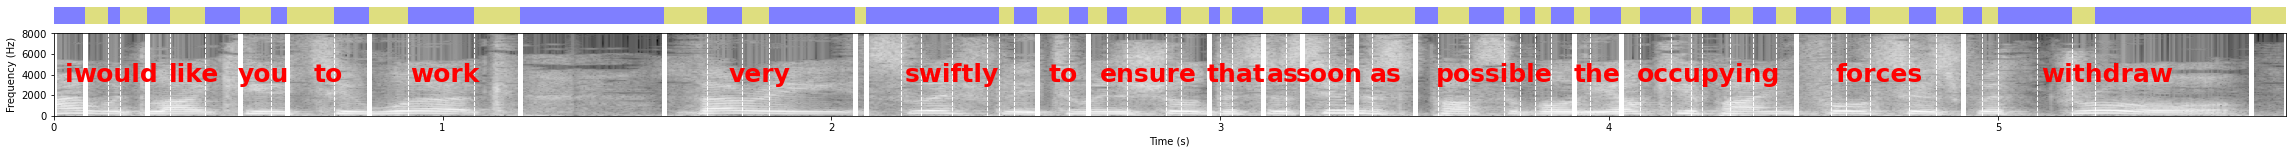

In [748]:
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
from fairseq_extract_waveform import get_features_or_waveform

def plot(span_levels, word_time_indices, phone_time_indices):
    # Load the waveform from a FLAC file
    if wav_file.endswith('.flac') or wav_file.endswith('.wav'):
        waveform, sample_rate = sf.read(wav_file)
    else: # fairseq compressed format 
        sample_rate = 16000
        waveform = get_features_or_waveform(wav_file, need_waveform=True, use_sample_rate=sample_rate)

    # Calculate the spectrogram using the specgram function
    NFFT = 256  # Size of FFT window
    window = np.hamming(NFFT)  # Window function
    noverlap = int(0.75 * NFFT)  # Overlap between windows

    # Set the figure size and create a figure with multiple axes
    levels = len(span_levels.keys())
    height_ratios = [0.2] * levels
    height_ratios.append(1)
    fig, axes = plt.subplots(nrows=levels+1, figsize=(40, 2*levels), gridspec_kw={'height_ratios': height_ratios})
    
    # Plot the spectrogram on the first axis
    ax1 = axes[-1]
    spec, freqs, bins, im = ax1.specgram(waveform, NFFT=NFFT, Fs=sample_rate,
                                          window=window, noverlap=noverlap,
                                          cmap='gray', aspect=4)
  
    # plot word seg
    for word, start_time, end_time in word_time_indices:
        start_index = int(start_time * sample_rate)
        end_index = int(end_time * sample_rate)
        start_time = start_index / sample_rate
        end_time = end_index / sample_rate
        ax1.axvline(start_time, linestyle='-', color='w', linewidth=5)
        ax1.axvline(end_time, linestyle='-', color='w', linewidth=5)
        ax1.text((start_time+end_time)/2.0, 4000, word, ha='center', va='center', weight='bold', color='red', fontsize=25)
    for _, start_time, end_time in phone_time_indices:
        start_index = int(start_time * sample_rate)
        end_index = int(end_time * sample_rate)
        start_time = start_index / sample_rate
        end_time = end_index / sample_rate
        ax1.axvline(start_time, linestyle='--', color='w', linewidth=1)
        ax1.axvline(end_time, linestyle='--', color='w', linewidth=1)
    ax1.set_xlim(0.0, end_time) # get rid of excess beginning and ending spaces 
    
    # Add a span to each additional axis
    # with alternating colors     
    colors = ['b', 'y']
    for level_idx, spans in span_levels.items():
        axi = axes[-1-level_idx-1]
        for span_idx, span in enumerate(spans):
            color = colors[span_idx % 2]
            axi.axvspan(span[0], span[1], facecolor=color, alpha=0.5)
        axi.set_xlim(ax1.get_xlim())
        axi.set_axis_off()
    
    # Set the figure background and save the plot
    fig.patch.set_facecolor('white')
    ax1.set_ylabel('Frequency (Hz)')
    ax1.set_xlabel('Time (s)')
    plt.savefig(save_pth, dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor())
    plt.show()

if parse_alg == "bottom_up":
    plot({0:span_levels[best_split]}, oracle_word_seg, oracle_phone_seg)
elif parse_alg == "top_down":
    # Option 1: plot all hierarchy of spans
#     plot(span_levels, oracle_word_seg, oracle_phone_seg)
    
    # Option 2: only plot the best spans 
    x = reverse_greedy_extended_span_levels[best_split]
    plot({0: x}, oracle_word_seg, oracle_phone_seg)
    
    

In [750]:
# parses = reverse_greedy_extended_span_levels[best_split]
parses = span_levels[best_split]
print(parse)
print()
oracle_phone_seg = [(x, y, z) for (x, y, z) in oracle_phone_seg if x != '']
oracle_phone_seg_phns = [x[0] for x in oracle_phone_seg]
oracle_phone_seg_starts = [x[1] for x in oracle_phone_seg]
oracle_phone_seg_ends = [x[2] for x in oracle_phone_seg]
print(oracle_phone_seg)

[(0.0, 0.08), (0.08, 0.14), (0.14, 0.24), (0.24, 0.3), (0.3, 0.39), (0.39, 0.48), (0.48, 0.56), (0.56, 0.6), (0.6, 0.81), (0.81, 0.91), (0.91, 1.08), (1.08, 1.2), (1.2, 1.57), (1.57, 1.68), (1.68, 1.77), (1.77, 1.84), (1.84, 2.06), (2.06, 2.09), (2.09, 2.4), (2.4, 2.43), (2.43, 2.47), (2.47, 2.53), (2.53, 2.61), (2.61, 2.71), (2.71, 3.0), (3.0, 3.03), (3.03, 3.11), (3.11, 3.21), (3.21, 3.32), (3.32, 3.35), (3.35, 3.5), (3.5, 3.73), (3.73, 3.81), (3.81, 3.91), (3.91, 4.91), (4.91, 4.96), (4.96, 5.65), (5.65, 5.74)]

[('AY1', 0.0, 0.08), ('W', 0.08, 0.14), ('UH1', 0.14, 0.17), ('D', 0.17, 0.24), ('L', 0.24, 0.3), ('AY1', 0.3, 0.39), ('K', 0.39, 0.48), ('Y', 0.48, 0.56), ('UW1', 0.56, 0.6), ('T', 0.6, 0.72), ('UW1', 0.72, 0.81), ('W', 0.81, 0.91), ('ER1', 0.91, 1.08), ('K', 1.08, 1.2), ('V', 1.57, 1.68), ('EH1', 1.68, 1.77), ('R', 1.77, 1.84), ('IY0', 1.84, 2.06), ('S', 2.09, 2.18), ('W', 2.18, 2.23), ('IH1', 2.23, 2.31), ('F', 2.31, 2.4), ('T', 2.4, 2.43), ('L', 2.43, 2.47), ('IY0', 2.47

In [751]:
from collections import defaultdict
phn_compositio_dict = defaultdict(int)
for seg in parses: 
    try: 
        start_phn = oracle_phone_seg_starts.index(seg[0])
    except: 
        continue 
    end_phn = oracle_phone_seg_ends.index(seg[1])
    phns = oracle_phone_seg_phns[start_phn: end_phn+1]
    if len(phns) > 1: 
        phn_compositio_dict[tuple(phns)] += 1
    
print(phn_compositio_dict)

defaultdict(<class 'int'>, {('S', 'W', 'IH1', 'F', 'T'): 1, ('EH1', 'Z'): 2, ('K', 'Y'): 1, ('TH', 'D'): 1})
